# 11주차 실습문제 - 신뢰구간 추정과 가설검정

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

---

## 1. t검정과 그룹 비교 시각화
아래 코드를 이용해 19세 남성과 19세 여성의 데이터를 10개씩 추출해 data2에 저장한다. 

In [2]:
data = pd.read_csv("health2018.csv")
data_man = data[(data.age==19) & (data.sex=='M')][0:10]
data_woman = data[(data.age==19) & (data.sex=='F')][0:10]

data2 = pd.concat([data_man, data_woman])

<Axes: xlabel='sex', ylabel='BMI'>

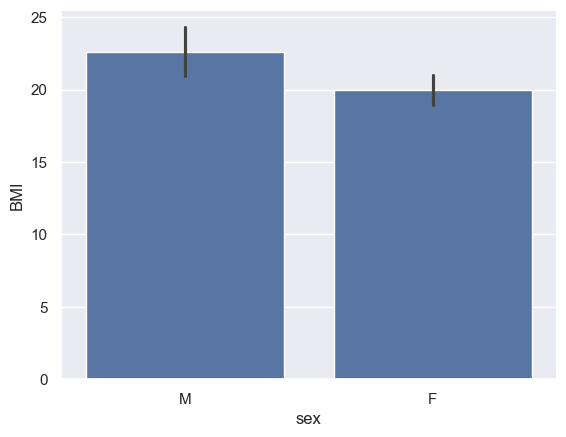

In [3]:
sns.barplot(data = data2, x='sex', y='BMI')

### 1-1. 위와 같이 sns.barplot을 이용해 남성과 여성의 BMI 평균값을 막대그래프로 표시하였다. 남성과 여성 표본에서 95% 신뢰구간을 t분포에 기반해 계산하고, 그래프의 오차막대와 일치하는지 확인하라.

In [4]:
bmi_man = data_man['BMI'].reset_index(drop=True)
bmi_woman = data_woman['BMI'].reset_index(drop=True)

mu_man = np.mean(bmi_man)
mu_woman = np.mean(bmi_woman)

fr_man = len(bmi_man) - 1
fr_woman = len(bmi_woman) - 1

sigma_m = np.std(bmi_man, ddof = 1)
sigma_w = np.std(bmi_woman, ddof = 1)

se_m = sigma_m / np.sqrt(len(bmi_man))
se_w = sigma_w / np.sqrt(len(bmi_woman))

interval_m = stats.t.interval(confidence = 0.95, df = fr_man, loc = mu_man, scale = se_m)
interval_w = stats.t.interval(confidence = 0.95, df = fr_woman, loc = mu_woman, scale = se_w)

print(f'남성 : {interval_m}, 여성 : {interval_w}')

남성 : (np.float64(20.486750201312), np.float64(24.669606478688003)), 여성 : (np.float64(18.74829845516353), np.float64(21.24899984083647))


위 박스plot의 오차 막대와 일치한다.

### 1-2. 대응표본 t검정과 독립표본 t검정을 사용해 남성과 여성의 BMI 평균이 다른지 검정하라 (두 p값을 비교해보라).
이 경우, 대응표본 t검정과 독립표본 t검정 중 어느 방법이 더 적절한가? 왜 그러한지 설명하시오.

In [5]:
# 대응 표본 t 검정 (남성과 여성의 차이?)
before = np.array(bmi_man)
after = np.array(bmi_woman)
print(stats.ttest_rel(after, before))

# 독립 표본 t 검정
print(stats.ttest_ind(after, before, equal_var = False))

TtestResult(statistic=np.float64(-2.1839532152377092), pvalue=np.float64(0.05680736151004806), df=np.int64(9))
TtestResult(statistic=np.float64(-2.394767153966043), pvalue=np.float64(0.03042517147864766), df=np.float64(14.704768937434634))


- 위 같은 경우 귀무가설은 '두 집단 간의 차이가 없다' 이다.
- p-value에 따르면
    - 대응 표본 t 검정의 p-value 값에 의하면 p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다.
    - 그러나 독립 표본 t 검정의 p-value 값에 의하면 p-value가 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
    - 두 집단(남성, 여성)의 경우 두 집단 간의 bmi 평균은 위에서 보았듯이 다르다. 따라서 p-value에 따라 독립표번 t-검정이 더 적절하다.

- 두 집단에 따르면
    - 대응표본 t-검정은 같은 집단에서 한 변화를 중심으로 전 후 과정을 나누어 변화 전 그룹과 변화 후 그룹을 비교하는 데 사용하는 반면,
    - 독립표본 t-검정은 서로 다른 두 집단(ex:여성, 남성)을 서로 비교하는데 사용한다.
    - 위 같은 경우에는 서로 다른 두 집단이므로 독립표본 t-검정을 사용하는 게 적절하다.

---

## 2. 분할표 검정 및 시각화

In [6]:
data3 = data[data.age<=20]    # 만 19~20세 남녀.
len(data3)

111

### 2-1. BMI 25 이상인 사람은 '비만', BMI 25 미만은 '정상'으로 분류한 뒤, 성별에 따라 비만 빈도를 표시하는 분할표(교차표)를 생성하라. 

In [7]:
def bmi(a) :
    if a >= 25 :
        return '비만'
    else :
        return '정상'
data3['분류'] = data['BMI'].apply(bmi)
cross_bmi = pd.crosstab(data3.sex, data3.분류)
cross_bmi

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_70964/4040874996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['분류'] = data['BMI'].apply(bmi)


분류,비만,정상
sex,,
F,7,54
M,11,39


### 2-2. 분할표 검정(카이제곱 검정)을 시행해 성별에 따라 과체중의 빈도가 다른지 p값을 구하시오.

In [ ]:
sp.stats.chi2_contingency(cross_bmi, correction = False)
# p값은 0.13으로 유의수준 0.05를 넘어 통계적으로 과체중의 빈도와 성별은 유의미한 상관관계가 없다. 따라서 성별에 따라 과체중의 빈도는 다르지 않다.

Chi2ContingencyResult(statistic=np.float64(2.240153358011634), pvalue=np.float64(0.13446764312934367), dof=1, expected_freq=array([[ 9.892, 51.108],
       [ 8.108, 41.892]]))

### 2-3. 위의 분할표에서 관찰된 샘플 수가 모두 2배가 된다면, 분할표 검정 결과는 어떻게 되는가?

In [ ]:
data6 = pd.concat([data3, data3])
cross_bmi6 = pd.crosstab(data6.sex, data6.분류)
sp.stats.chi2_contingency(cross_bmi6, correction= False)
# p값은 0.03으로 유의수준 0.05보다 작아진다. 이는 '성별'과 '과체중' 간에 통계적으로 유의미한 관계가 있다고 볼 수 있다.

Chi2ContingencyResult(statistic=np.float64(4.480306716023268), pvalue=np.float64(0.03428756718303291), dof=1, expected_freq=array([[ 19.784, 102.216],
       [ 16.216,  83.784]]))